In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load the merged NHANES dataset from GitHub
url = "https://raw.githubusercontent.com/chenzaiproject/capstone/refs/heads/main/data/merged_nhanes_data.csv"
df = pd.read_csv(url)

# Step 3: Preview the dataset
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2017, 49)


,Unnamed: 0,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,BMXBMI,BMXHIP,BMXHT,BMXWAIST,...,HUQ042,HUQ055,HUQ090,HIQ011,HIQ032A,HIQ032B,HIQ032D,HIQ032F,HIQ032H,HIQ032I
0,0,130378.0,1.0,43.0,5.0,5.00,27.0,102.9,179.5,98.3,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
1,1,130379.0,1.0,66.0,5.0,5.00,33.5,112.4,174.2,114.7,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
2,2,130380.0,2.0,44.0,3.0,1.41,29.7,98.0,152.9,93.5,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
3,3,130386.0,1.0,34.0,4.0,1.33,30.2,110.6,173.3,106.1,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
4,4,130394.0,1.0,51.0,5.0,5.00,24.4,99.4,177.3,92.1,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
#Initial Cleaning & Preprocessing
# Step 1: Basic info
df.info()

# Step 2: Replace impossible placeholder values
invalid_placeholder = 5.397605346934028e-79
df.replace(invalid_placeholder, np.nan, inplace=True)

# Step 3: Decode byte strings (e.g., b'W', b'D') to regular strings
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Step 4: Check % missing values per column
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("Columns with more than 30% missing:")
print(missing_ratio[missing_ratio > 0.3])

# Drop columns with more than 30% missing
df_cleaned = df.drop(columns=missing_ratio[missing_ratio > 0.3].index)

# Step 5: Separate numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Step 6: Impute missing values
from sklearn.impute import SimpleImputer

# Median for numeric
num_imputer = SimpleImputer(strategy='median')
df_cleaned[numerical_cols] = num_imputer.fit_transform(df_cleaned[numerical_cols])

# Mode for categorical
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_cols] = cat_imputer.fit_transform(df_cleaned[categorical_cols])

# Final check
print("Any missing values left:", df_cleaned.isnull().sum().sum())
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2017 non-null   int64  
 1   SEQN        2017 non-null   float64
 2   RIAGENDR    2017 non-null   float64
 3   RIDAGEYR    2017 non-null   float64
 4   DMDEDUC2    1946 non-null   float64
 5   INDFMPIR    1950 non-null   float64
 6   BMXBMI      2006 non-null   float64
 7   BMXHIP      1969 non-null   float64
 8   BMXHT       2012 non-null   float64
 9   BMXWAIST    1978 non-null   float64
 10  BMXWT       2008 non-null   float64
 11  BPXOSY1     2017 non-null   float64
 12  BPXOSY2     2017 non-null   float64
 13  BPXOSY3     2017 non-null   float64
 14  BPXODI1     2017 non-null   float64
 15  BPXODI2     2017 non-null   float64
 16  BPXODI3     2017 non-null   float64
 17  SYSBP       2017 non-null   float64
 18  DIABP       2017 non-null   float64
 19  WTSAF2YR    2017 non-null  

,Unnamed: 0,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,BMXBMI,BMXHIP,BMXHT,BMXWAIST,...,HUQ042,HUQ055,HUQ090,HIQ011,HIQ032A,HIQ032B,HIQ032D,HIQ032F,HIQ032H,HIQ032I
0,0.0,130378.0,1.0,43.0,5.0,5.00,27.0,102.9,179.5,98.3,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
1,1.0,130379.0,1.0,66.0,5.0,5.00,33.5,112.4,174.2,114.7,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
2,2.0,130380.0,2.0,44.0,3.0,1.41,29.7,98.0,152.9,93.5,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
3,3.0,130386.0,1.0,34.0,4.0,1.33,30.2,110.6,173.3,106.1,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
4,4.0,130394.0,1.0,51.0,5.0,5.00,24.4,99.4,177.3,92.1,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop irrelevant columns
df_model = df_cleaned.drop(columns=["Unnamed: 0", "SEQN"])

# Identify categorical features for one-hot encoding
categorical_features = ['PAD790U', 'PAD810U']
numerical_features = [col for col in df_model.columns if col not in categorical_features]

# Updated preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Apply transformation
X_processed = preprocessor.fit_transform(df_model)

# Check shape
print("Final feature matrix shape:", X_processed.shape)


Final feature matrix shape: (2017, 51)


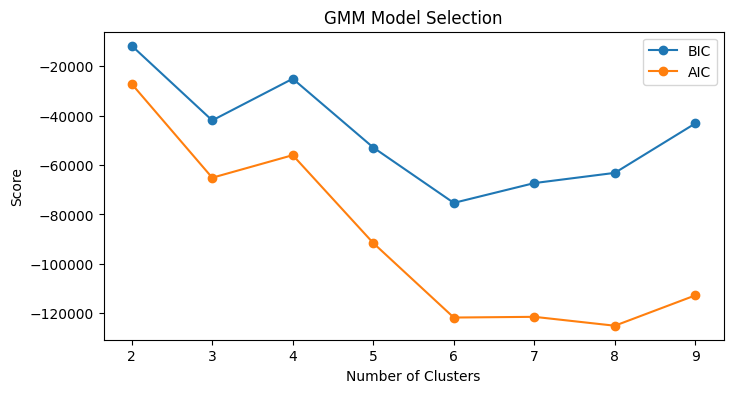

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Try different cluster numbers
n_components = range(2, 10)
bics = []
aics = []

for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_processed)
    bics.append(gmm.bic(X_processed))
    aics.append(gmm.aic(X_processed))

# Plot BIC/AIC to choose k
plt.figure(figsize=(8, 4))
plt.plot(n_components, bics, label='BIC', marker='o')
plt.plot(n_components, aics, label='AIC', marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("GMM Model Selection")
plt.legend()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

health_cols = ['BMXBMI','BMXHIP','BMXHT','BMXWAIST','BMXWT','BPXOSY1',
                                 'BPXOSY2','BPXOSY3','BPXODI1','BPXODI2','BPXODI3','SYSBP',
                                 'DIABP','WTSAF2YR','LBXGLU','WTPH2YR','LBDHDD','LBXVIDMS',
                                 'LBXVD2MS','LBXVD3MS','LBXVE3MS','LBXGH','LBXTC']

scaler = StandardScaler()
X_bio = scaler.fit_transform(df_cleaned[health_cols])

gmm = GaussianMixture(n_components=6, random_state=42)
df_cleaned['Cluster'] = gmm.fit_predict(X_bio)


<Axes: xlabel='PCA1', ylabel='PCA2'>

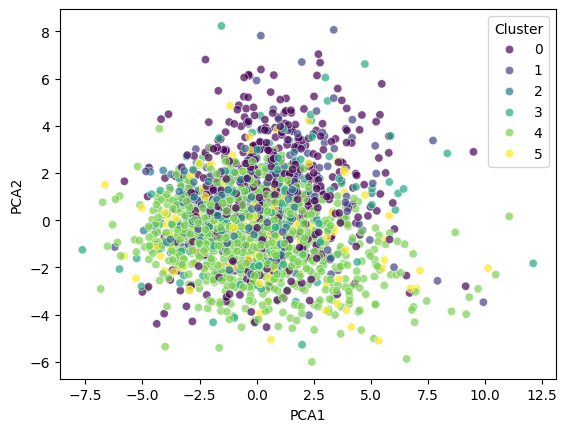

In [ ]:
# clusters include all health indicators

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bio)
df_cleaned['PCA1'] = X_pca[:, 0]
df_cleaned['PCA2'] = X_pca[:, 1]

sns.scatterplot(
    data=df_cleaned,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis', alpha=0.7
)

<Axes: xlabel='PCA1_bm', ylabel='PCA2_bm'>

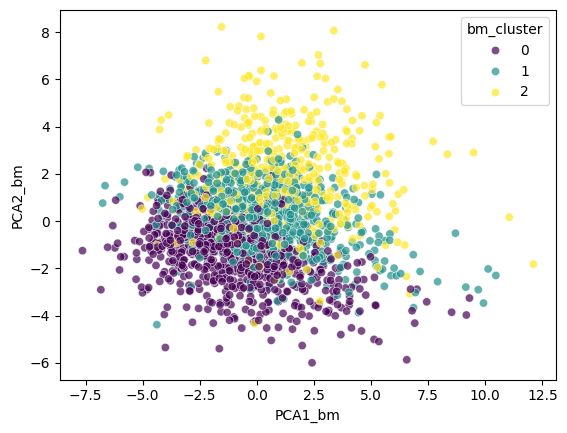

In [ ]:
# Clusters only include body measurement data

bm_cols = ['BMXBMI','BMXHIP','BMXHT','BMXWAIST','BMXWT']
X_bm = scaler.fit_transform(df_cleaned[bm_cols])

bm_gmm = GaussianMixture(n_components=3, random_state=42)
df_cleaned['bm_cluster'] = bm_gmm.fit_predict(X_bm)
pca = PCA(n_components=2)
df_cleaned['PCA1_bm'] = X_pca[:, 0]
df_cleaned['PCA2_bm'] = X_pca[:, 1]

sns.scatterplot(
    data=df_cleaned,
    x='PCA1_bm', y='PCA2_bm',
    hue='bm_cluster',
    palette='viridis', alpha=0.7
)

<Axes: xlabel='PCA1_cardio', ylabel='PCA2_cardio'>

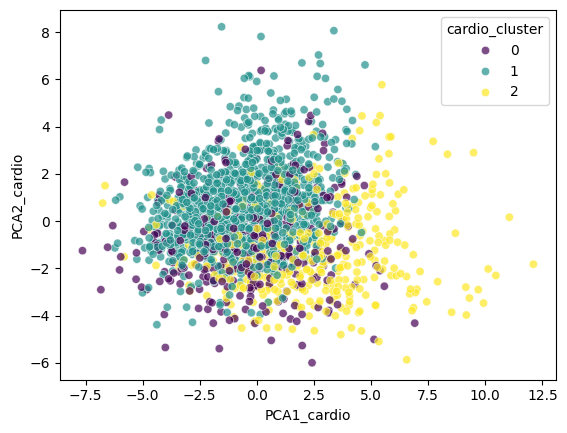

In [ ]:
"""
Clusters include only blood pressure and cholesterol data for clusters at risk of
cardiovascular disease
"""
# removed cols: 'BPXOSY1','WTPH2YR','BPXODI1', 'BPXOSY2','BPXOSY3','BPXODI2','BPXODI3'
cardio_cols = ['SYSBP','DIABP','LBDHDD', 'LBXTC']

X_cardio = scaler.fit_transform(df_cleaned[cardio_cols])

cardio_gmm = GaussianMixture(n_components=3, random_state=42)
df_cleaned['cardio_cluster'] = cardio_gmm.fit_predict(X_cardio)
pca = PCA(n_components=2)
df_cleaned['PCA1_cardio'] = X_pca[:, 0]
df_cleaned['PCA2_cardio'] = X_pca[:, 1]

sns.scatterplot(
    data=df_cleaned,
    x='PCA1_cardio', y='PCA2_cardio',
    hue='cardio_cluster',
    palette='viridis', alpha=0.7
)

<Axes: xlabel='PCA1_glu', ylabel='PCA2_glu'>

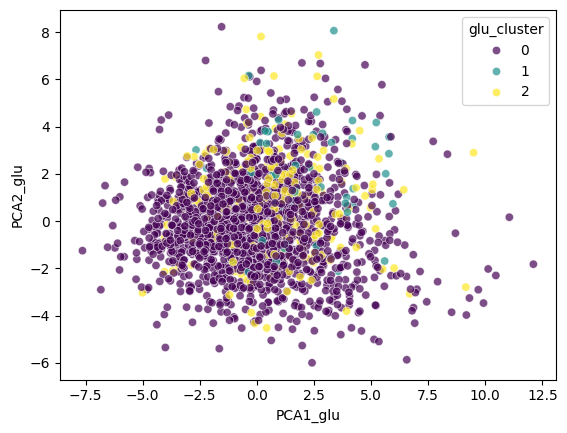

In [ ]:
"""
Finally, clustering with only blood glucose and glycohemoglobin levels
"""

glu_cols = ['LBXGH', 'LBXGLU']
X_glu = scaler.fit_transform(df_cleaned[glu_cols])

glu_gmm = GaussianMixture(n_components=3, random_state=42)
df_cleaned['glu_cluster'] = glu_gmm.fit_predict(X_glu)
pca = PCA(n_components=2)
df_cleaned['PCA1_glu'] = X_pca[:, 0]
df_cleaned['PCA2_glu'] = X_pca[:, 1]

sns.scatterplot(
    data=df_cleaned,
    x='PCA1_glu', y='PCA2_glu',
    hue='glu_cluster',
    palette='viridis', alpha=0.7
)

In [ ]:
df_cleaned.info(), df_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2017 non-null   float64
 1   SEQN            2017 non-null   float64
 2   RIAGENDR        2017 non-null   float64
 3   RIDAGEYR        2017 non-null   float64
 4   DMDEDUC2        2017 non-null   float64
 5   INDFMPIR        2017 non-null   float64
 6   BMXBMI          2017 non-null   float64
 7   BMXHIP          2017 non-null   float64
 8   BMXHT           2017 non-null   float64
 9   BMXWAIST        2017 non-null   float64
 10  BMXWT           2017 non-null   float64
 11  BPXOSY1         2017 non-null   float64
 12  BPXOSY2         2017 non-null   float64
 13  BPXOSY3         2017 non-null   float64
 14  BPXODI1         2017 non-null   float64
 15  BPXODI2         2017 non-null   float64
 16  BPXODI3         2017 non-null   float64
 17  SYSBP           2017 non-null   f

(None,
    Unnamed: 0      SEQN  RIAGENDR  RIDAGEYR  DMDEDUC2  INDFMPIR  BMXBMI  \
 0         0.0  130378.0       1.0      43.0       5.0      5.00    27.0   
 1         1.0  130379.0       1.0      66.0       5.0      5.00    33.5   
 2         2.0  130380.0       2.0      44.0       3.0      1.41    29.7   
 3         3.0  130386.0       1.0      34.0       4.0      1.33    30.2   
 4         4.0  130394.0       1.0      51.0       5.0      5.00    24.4   
 
    BMXHIP  BMXHT  BMXWAIST  ...  HIQ032I  Cluster      PCA1      PCA2  \
 0   102.9  179.5      98.3  ...      2.0        4  3.690845 -0.087764   
 1   112.4  174.2     114.7  ...      2.0        4  0.691817  1.566399   
 2    98.0  152.9      93.5  ...      2.0        0 -0.371162  0.942918   
 3   110.6  173.3     106.1  ...      2.0        4 -0.322575  0.725724   
 4    99.4  177.3      92.1  ...      2.0        4 -1.661927  0.348996   
 
    bm_cluster   PCA1_bm   PCA2_bm  cardio_cluster  PCA1_cardio  PCA2_cardio  
 0        

In [ ]:
df_clustered = df_cleaned.copy()
df_clustered = df_clustered.rename(columns={
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age",
    "INDFMPIR": "Income",
    "BMXBMI": "BMI",
    "BMXWAIST": "Waist",
    "BMXHT": "Height"
})

# Group by clusters and get mean stats
cluster_summary = df_clustered.groupby("Cluster")[["Gender", "Age", "Income", "BMI", "Waist", "Height", "SYSBP", "DIABP"]].mean().reset_index()

cluster_summary.head()


,Cluster,Gender,Age,Income,BMI,Waist,Height,SYSBP,DIABP
0,0,1.503311,54.818985,3.040464,34.649227,111.946358,167.562031,121.162252,73.965784
1,1,1.504505,49.819820,2.755135,31.370270,104.388288,168.233333,124.626126,75.360360
2,2,1.432258,39.619355,3.530129,26.675484,93.261935,172.458710,113.954839,71.264516
3,3,1.779310,51.793103,3.067931,32.295172,103.626207,164.083448,118.589655,76.182759
4,4,1.561072,54.862959,3.313575,26.747071,94.381529,167.226812,122.082423,73.244786


# **Cluster Insights Summary**
 Our unsupervised clustering revealed five distinct health-related profiles based on body morphology, demographics and vital signs. These clusters highlight meaningful variation across age, gender distribution, BMI, waist circumference, income level, and blood pressure; offering a more nuanced view of health risk profiles beyond traditional BMI categorizations.

**Cluster 0:  Older, High-Risk Males with Central Obesity**

* Gender: Predominantly male
* Average Age: 54.8 years
* Income Level: Moderate
* BMI: 34.6 (Obese)
* Waist Circumference: ~112 cm
* Blood Pressure (SYS/DIAS): 121 / 74

This group represents older individuals with high BMI and waist circumference, indicating significant risk for obesity-related conditions.


**Cluster 1: Middle-Aged Males with Elevated BMI**

* Gender: Predominantly male
* Average Age: 49.8 years
* Income Level: Lower-middle
* BMI: 31.4 (Obese)
* Waist Circumference: ~104 cm
* Blood Pressure: 124.6 / 75.4

Slightly younger than Cluster 0, these individuals still fall in the obese category with similarly concerning waist measurements and blood pressure.


**Cluster 2:  Younger, Healthier Individuals with Higher Socioeconomic Status**
* Gender: Majority male
* Average Age: 39.6 years (Youngest)
* Income Level: Highest among clusters
* BMI: 26.7 (Overweight)
* Waist Circumference: ~93 cm
* Blood Pressure: 114 / 71

This cluster demonstrates a relatively healthier profile: younger age, lower BMI, healthier blood pressure, and the tallest average height; suggesting lower overall metabolic risk.


**Cluster 3:  Middle-Aged to Older Males with Elevated Health Markers**
* Gender: Most male-dominated group
* Average Age: 51.8 years
* Income Level: Moderate
* BMI: 32.3 (Obese)
* Waist Circumference: ~104 cm
* Blood Pressure: 118.6 / 76.2

These individuals show signs of elevated obesity and blood pressure, placing them in a moderate-to-high health risk category.


**Cluster 4: Older Adults with Lower BMI and Better Vitals**
* Gender: Predominantly male
* Average Age: 54.9 years (Oldest group)
* Income Level: Relatively high
* BMI: 26.7 (Overweight, not obese)
* Waist Circumference: ~94 cm
* Blood Pressure: 122.1 / 73.2

Despite being in the same age range as Cluster 0, this group exhibits significantly lower BMI and healthier measurements, potentially representing a resilient older population with better health maintenance.